In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
df = pd.read_csv(r"C:\Users\pc\Desktop\data\sierraleone-bumbuna.csv", parse_dates=["Timestamp"])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [8]:
# Summary stats
df.describe()

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Comments    525600
dtype: int64

In [9]:
# Z-score method for key variables
for col in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]:
    df[f"{col}_z"] = stats.zscore(df[col], nan_policy='omit')
    
outliers = df[(df[["GHI_z","DNI_z","DHI_z"]].abs() > 3).any(axis=1)]
print(f"Outliers detected: {len(outliers)} rows")

# Clean (drop or impute)
df_clean = df.copy()
df_clean = df_clean[(df_clean[["GHI_z","DNI_z","DHI_z"]].abs() <= 3).all(axis=1)]
df_clean = df_clean.drop(columns=[c for c in df_clean if "_z" in c])


Outliers detected: 11548 rows


In [10]:
df_clean.to_csv(r"C:\Users\pc\Week-solar\data/sierra_leone.csv", index=False)


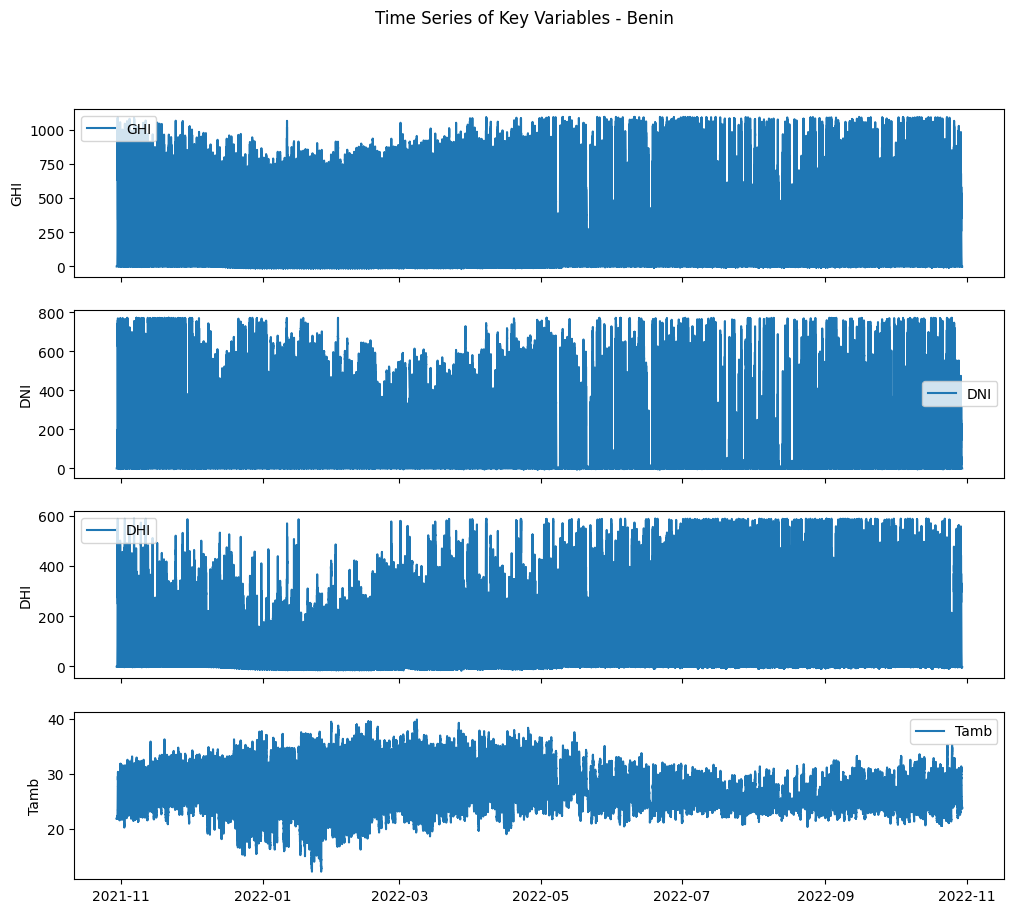

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(12,10), sharex=True)
cols = ["GHI", "DNI", "DHI", "Tamb"]

for i, col in enumerate(cols):
    axs[i].plot(df_clean["Timestamp"], df_clean[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()

plt.suptitle("Time Series of Key Variables - Benin")
plt.show()


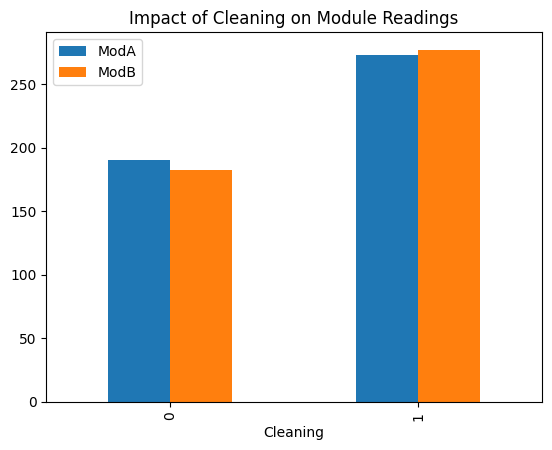

In [12]:
df_clean.groupby("Cleaning")[["ModA","ModB"]].mean().plot(kind="bar")
plt.title("Impact of Cleaning on Module Readings")
plt.show()


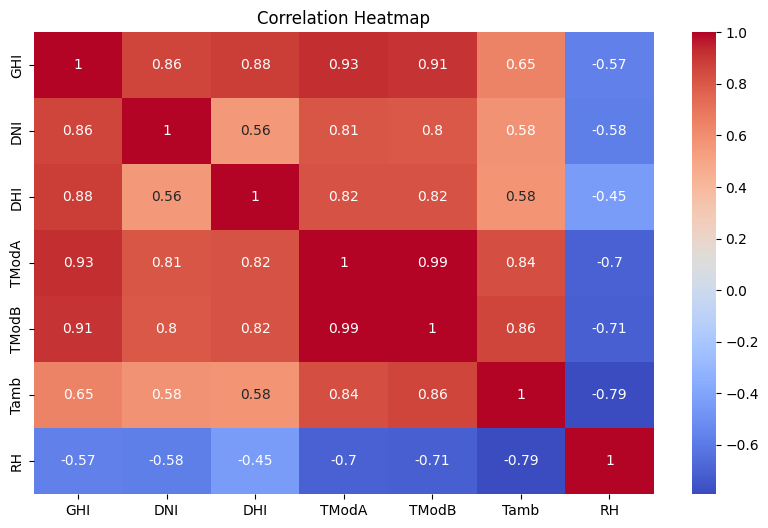

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB","Tamb","RH"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


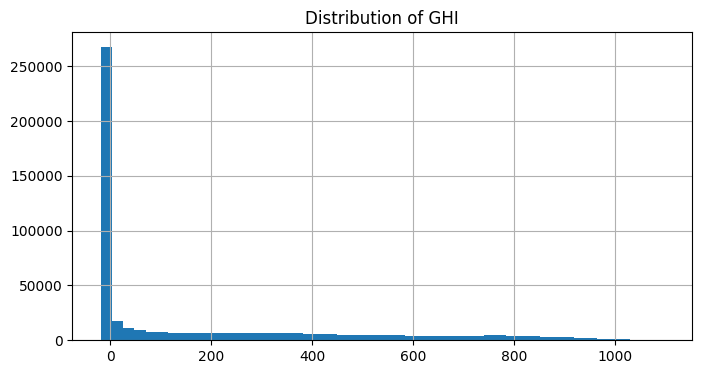

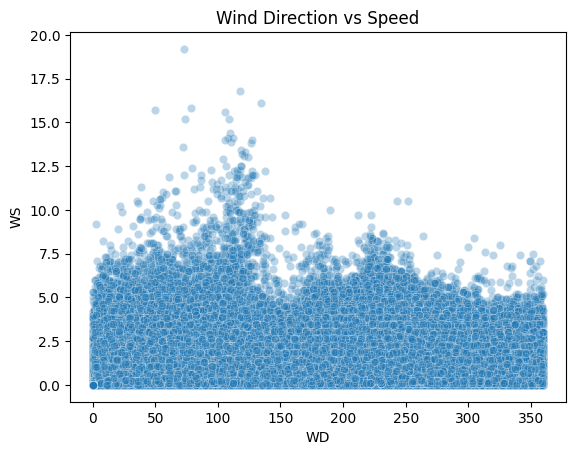

In [14]:
# Histogram
df_clean["GHI"].hist(bins=50, figsize=(8,4))
plt.title("Distribution of GHI")
plt.show()

# Wind speed vs direction
sns.scatterplot(x="WD", y="WS", data=df_clean, alpha=0.3)
plt.title("Wind Direction vs Speed")
plt.show()


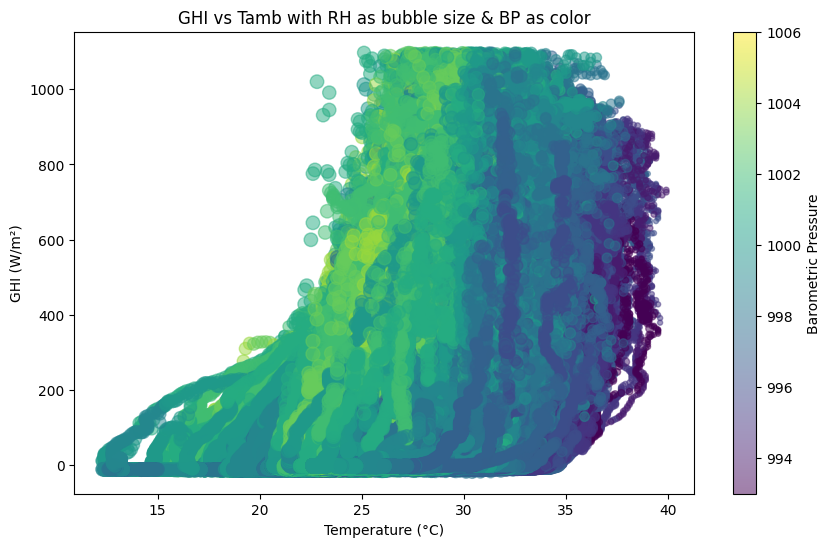

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"], 
            s=df_clean["RH"], alpha=0.5, c=df_clean["BP"], cmap="viridis")
plt.colorbar(label="Barometric Pressure")
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Tamb with RH as bubble size & BP as color")
plt.show()
